In [1]:
#prior to running code, export your behavior data for a single trial/animal from ethovision as a .xlsx file, with results binned per frame.
#my side view data is correctly tracked at 30fps, so it is already properly aligned to the nose-nose distance data.
#my top view is only tracked at 15fps in ethovision, so I need to duplicate each row to fill in to 30fps.

#use this code to make top view file 30fps.
#once you get the updated excel file, copy these values into the excel file with the side view data

import pandas as pd

# Read Excel file into DataFrame
input_file = "rastor_behavior/16_forRastor_ethovision_topView.xlsx"
df = pd.read_excel(input_file)

# Duplicate each row
df_duplicated = df.reindex(df.index.repeat(2)).reset_index(drop=True)

# Define the output file name
output_file = "rastor_behavior/16_forRastor_ethovision_topView_adaptedFrames.xlsx"

# Write the duplicated DataFrame to a new Excel file
df_duplicated.to_excel(output_file, index=False)

print("File created successfully:", output_file)


File created successfully: rastor_behavior/16_forRastor_ethovision_topView_adaptedFrames.xlsx


In [1]:
#use this code to import your behavior data from ethovision as a pandas df. 
#make sure to take out all information at top of file & any unwanted columns before importing.

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'rastor_behavior/16_forRastor.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
df = df.iloc[:,1:] #get rid of the first column (time stamp)
# Replace '-' with 0, convert to float, and then replace NaN with 0 before converting to integers
df = df.replace('-', '0').astype(float).fillna(0).astype(int)
df = df.astype(int) #replace all strings with integers in dataframe

# Display the DataFrame
df


,social reactivity,social initiation,first tube approach,reverse in tube,social freezing,sniffing,groom,freeze,aggression,tube,empty chamber,social chamber
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17260,0,0,0,0,0,1,0,0,0,0,0,1
17261,0,0,0,0,0,1,0,0,0,0,0,1
17262,0,0,0,0,0,1,0,0,0,0,0,1
17263,0,0,0,0,0,1,0,0,0,0,0,1


In [2]:
#use this code to import your nose-nose distance data into a pandas dataframe. 
#The input format should be a .csv file with a single column that contains the nose-nose distance between mice in each frame. make sure to add a name at the top of the sheet. 

# Replace 'your_file.csv' with the actual path to your CSV file
distance_file_path = 'rastor_behavior/16_frame_distance_nn.csv'

# Read the CSV file into a Pandas DataFrame
dist_data = pd.read_csv(distance_file_path)

dist_data

,414.96
0,413.730
1,410.820
2,409.740
3,404.810
4,407.080
...,...
17994,66.361
17995,62.547
17996,60.055
17997,49.015


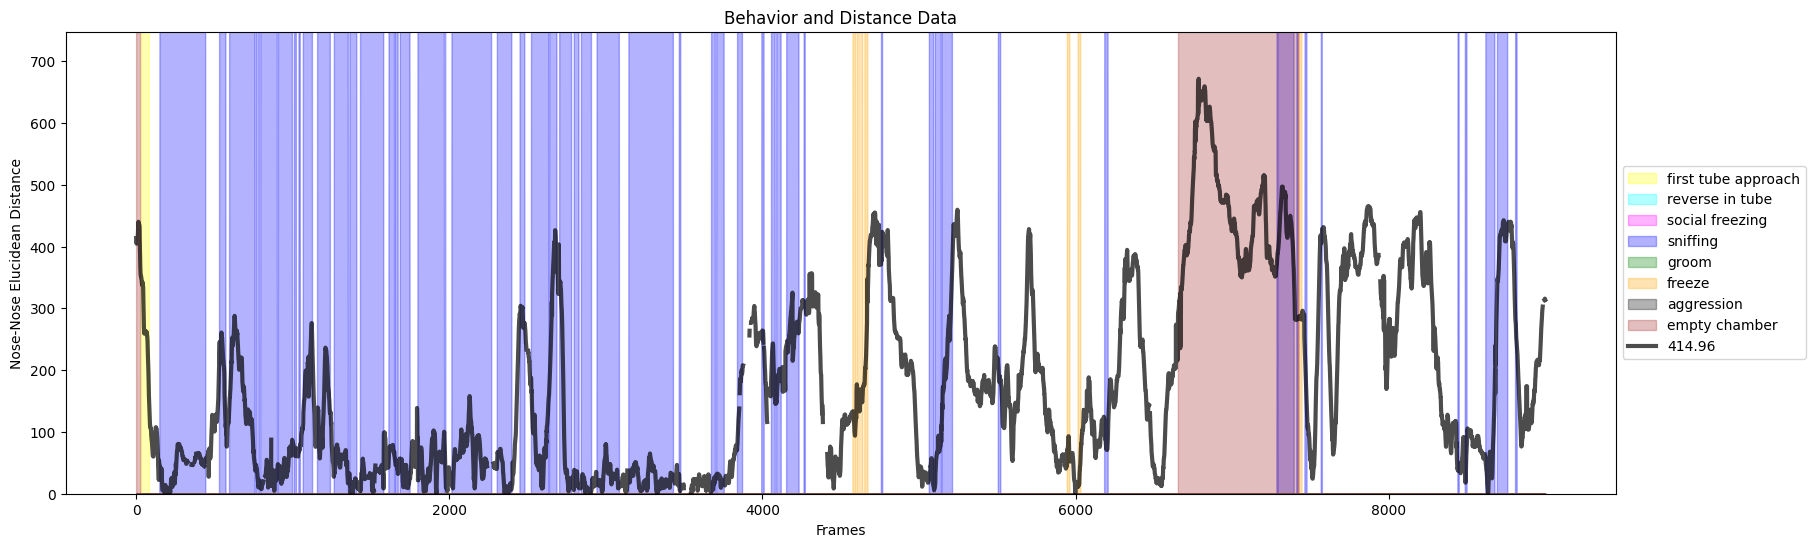

In [4]:
#use this code to make a behavior rastor plot with nose-nose distance as a line and behaviors overlayed.

import matplotlib.pyplot as plt

# Plot only the first 9000 values
df1 = df.iloc[:9000,[2,3,4,5,6,7,8,10]] #plot only the first 9000 frames (5 mins); plot only the selected behavior columns.
dist_data1 = dist_data.iloc[:9000,:] # Plot only the first 9000 values
max_dist = dist_data.max().max() #this finds the height of the y axis
df2 = df1 * max_dist #this make the behaviors as tall as the y axis


# Set the figure size to be wider (e.g., 20 units wide)
fig, ax = plt.subplots(figsize=(20, 6))

# Fill area under the curves for behavior data
colors = ['yellow', 'cyan', 'magenta', 'blue','green','orange','black','brown'] #choose the colors for each behavior column
for i, column in enumerate(df2.columns):
    ax.fill_between(df2.index, df2[column], alpha=0.3, label=f'{column}', color=colors[i])

# Plotting the DataFrame using the plot function for distance data
dist_data1.plot.line(ax=ax, linewidth=3, alpha=0.7, label='Distance', color='black') # linestyle='dashed',  color='blue'

# Set labels and title
plt.xlabel('Frames')
plt.ylabel('Nose-Nose Elucidean Distance')
plt.title('Behavior and Distance Data')

# Set y-axis limits to match the maximum value in dist_data
ax.set_ylim(0, max_dist)

# Create legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#save plot
plt.savefig('./rastor_behavior/16_rastorPlot.png')

# Show the plot
plt.show()

